In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import scipy as scp
import pandas as pd
import copy as cp

sns.set(style="ticks", context='poster')
%matplotlib inline

**Author:** [Ata Kalirad](https://github.com/Kalirad)

In [2]:
%run digital_worm.py

## Uisng `digital_worm.py`:

In order to run a population projection for the plastic strain (RSC017, labeled as `A` in this model), and the non-plastic strain (RS5405, labeled as `C` in this model), based on the experimentally-informed fecundity, developmental, speed, and predation. You should specify the following parameters:

+ `strain_1` and `strain_2`: either A and/or C.

+ `food_type`: either _E.coli_ (`OP50`) or _Novosphingobium_ (`Novo`).

+ `inti_food`: initial amount of food available to the population. 

+ `mig_rate`: the proportion of dauer larvae that migrate from a source locality to a sink locality in each step.

+ `n_pop`: number of localities in the population. If set at one, a homogeneous population is created. 

+ `t`: number of projection steps.

+ `predation`: If True, adults prey upon J2 individuals. 

# Main modeling figures

You can generate the main modeling figures in the manuscript using the code below.

In [4]:
food_0 = 1e12

## Figure 4b - 4c

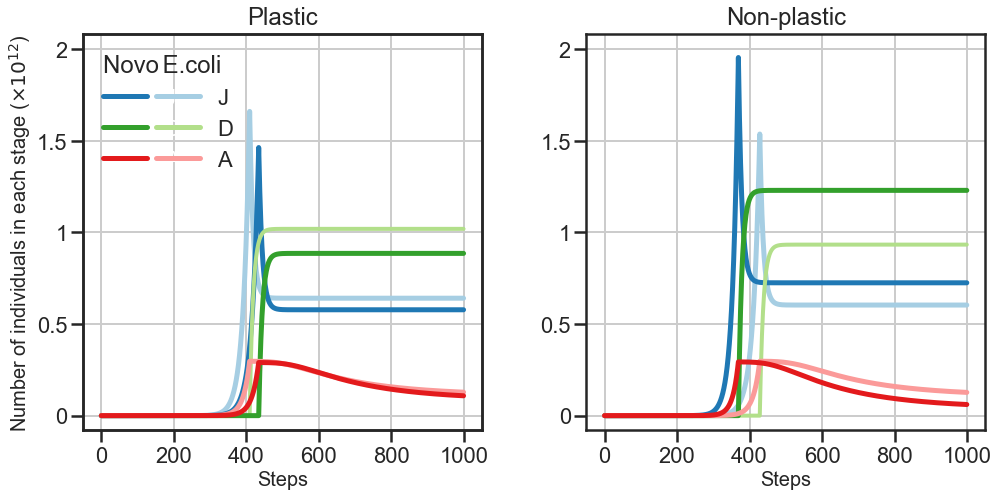

In [6]:
grad = sns.color_palette("Paired")


labls = ['J', 'D', 'A']


fig, ax = plt.subplots(1, 2, figsize=(14,7))
    
sim, index, md = simulate_pop_dynamic('A', 'A', food_type=['OP50', 'Novo'], inti_food=12*food_0, mig_rate=0.0, n_pop=2,  t=1000)
for l in range(3):
    if l == 0:
        ax[0].plot([i[1][0]+i[3][0]+i[4][0] for i in sim['pop1'][(0,0)]], lw=5, color=grad[0])
        ax[0].plot([i[1][0]+i[3][0]+i[4][0] for i in sim['pop2'][(0, 1)]], label=labls[l], lw=5, color=grad[1])
    elif l == 1:
        ax[0].plot([i[2][0] for i in sim['pop1'][(0,0)]], lw=4, color=grad[2])
        ax[0].plot([i[2][0] for i in sim['pop2'][(0, 1)]], label=labls[l],  lw=5, color=grad[3])
    else:
        ax[0].plot([np.sum(i[5:]) for i in sim['pop1'][(0,0)]], lw=5, color=grad[4])
        ax[0].plot([np.sum(i[5:]) for i in sim['pop2'][(0, 1)]], label=labls[l],  lw=5, color=grad[5])
        
sim, index, md = simulate_pop_dynamic('C', 'C', food_type=['OP50', 'Novo'], inti_food=12*food_0, mig_rate=0.0, n_pop=2,  t=1000)
for l in range(3):
    if l == 0:
        ax[1].plot([i[1][0]+i[3][0]+i[4][0] for i in sim['pop1'][(0,0)]], lw=5, color=grad[0])
        ax[1].plot([i[1][0]+i[3][0]+i[4][0] for i in sim['pop2'][(0, 1)]], lw=5, color=grad[1])
    elif l == 1:
        ax[1].plot([i[2][0] for i in sim['pop1'][(0,0)]], lw=4, color=grad[2])
        ax[1].plot([i[2][0] for i in sim['pop2'][(0, 1)]],  lw=5, color=grad[3])
    else:
        ax[1].plot([np.sum(i[5:]) for i in sim['pop1'][(0,0)]], lw=5, color=grad[4])
        ax[1].plot([np.sum(i[5:]) for i in sim['pop2'][(0, 1)]],  lw=5, color=grad[5])
axpad=8e10
for i in ax:
    i.set_ylim(-1*axpad, 2e12 + axpad)
    i.set_yticks(np.linspace(0, 2e12, 5))
    i.set_yticklabels([ 0, 0.5, 1, 1.5, 2])
    i.set_xlabel(r"Steps", fontsize=20)
    i.grid(True)
# ax[0].set_title('RSC017', pad=10)
# ax[1].set_title('RS5405', pad=10)

ax[0].set_title('Plastic', pad=10)
ax[1].set_title('Non-plastic', pad=10)

ax[0].set_ylabel(r'Number of individuals in each stage ($\times 10^{12}$)', fontsize=20)

ax2 = ax[0].twinx()
for l, count in zip(range(3), [0, 2, 4]):
    ax2.plot(0, label=labls[l], lw=5, color=grad[count])
ax2.set_yticklabels([])
ax2.tick_params(axis='y', which='both', bottom=True, top=False,
            labelbottom=True, size=0, width=3, direction='out', pad=5, colors='black')

leg = ax[0].legend(loc='upper left',frameon=False, title='Novo  ', labelcolor='white')
leg2= ax2.legend(loc=(0.15 + 0.01,0.635),frameon=False, title=' E.coli')
leg._legend_box.align = "left"
leg2._legend_box.align = "left"

plt.tight_layout(w_pad=5)

plt.savefig('./fig4b.pdf', bbox_inches='tight', dpi=300)

## Figure 4e - 4f

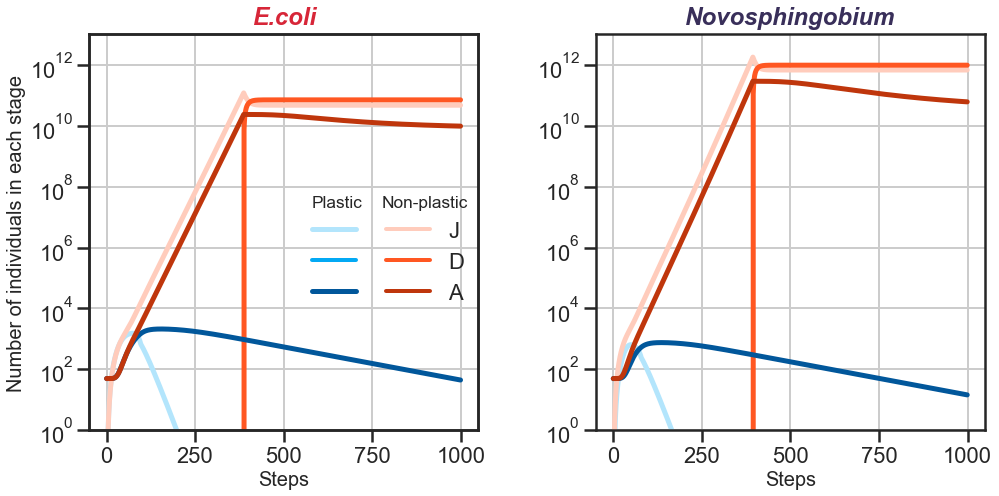

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
    
grad_1 = ['#B3E5FC', '#03A9F4', '#01579B']
grad_2 = ['#FFCCBC', '#FF5722', '#BF360C']

sim, index, md = simulate_pop_dynamic('A', 'C', food_type='OP50', inti_food=food_0, mig_rate=0.0, n_pop=1,  t=1000)
for l in range(3):
    if l == 0:
        ax[0].plot([i[1][0]+i[3][0]+i[4][0] for i in sim['pop1'][(0,0)]], label=labls[l], lw=5, color=grad_1[0])
        ax[0].plot([i[1][0]+i[3][0]+i[4][0] for i in sim['pop2'][(0,0)]], lw=5, color=grad_2[0])
    elif l == 1:
        ax[0].plot([i[2][0] for i in sim['pop1'][(0,0)]], label=labls[l],lw=4, color=grad_1[1])
        ax[0].plot([i[2][0] for i in sim['pop2'][(0,0)]],   lw=5, color=grad_2[1])
    else:
        ax[0].plot([np.sum(i[5:]) for i in sim['pop1'][(0,0)]],label=labls[l], lw=5, color=grad_1[2])
        ax[0].plot([np.sum(i[5:]) for i in sim['pop2'][(0,0)]], lw=5, color=grad_2[2])
        
sim, index, md = simulate_pop_dynamic('A', 'C', food_type='Novo', inti_food=12*food_0, mig_rate=0.0, n_pop=1,  t=1000)
for l in range(3):
    if l == 0:
        ax[1].plot([i[1][0]+i[3][0]+i[4][0] for i in sim['pop1'][(0,0)]], label=labls[l], lw=5, color=grad_1[0])
        ax[1].plot([i[1][0]+i[3][0]+i[4][0] for i in sim['pop2'][(0,0)]], lw=5, color=grad_2[0])
    elif l == 1:
        ax[1].plot([i[2][0] for i in sim['pop1'][(0,0)]], label=labls[l],lw=4, color=grad_1[1])
        ax[1].plot([i[2][0] for i in sim['pop2'][(0,0)]],   lw=5, color=grad_2[1])
    else:
        ax[1].plot([np.sum(i[5:]) for i in sim['pop1'][(0,0)]],label=labls[l], lw=5, color=grad_1[2])
        ax[1].plot([np.sum(i[5:]) for i in sim['pop2'][(0,0)]], lw=5, color=grad_2[2])

for i in ax:        
    i.set_yscale('log')   
    i.set_ylim(1, 1e13)
    i.set_xlabel(r"Steps", fontsize=20)
    i.grid(True)
    
ax2 = ax[0].twinx()
for l, count in zip(range(3), [0, 1, 2]):
    ax2.plot(10, label=labls[l], lw=4, color=grad_2[count])
ax2.set_yticklabels([])
ax2.tick_params(axis='y', which='both', bottom=True, top=False,
            labelbottom=True, size=0, width=3, direction='out', pad=5, colors='black')

leg = ax[0].legend(loc=(0.55,0.3),frameon=False, title='Plastic', labelcolor='white')
leg2= ax2.legend(loc=(0.73,0.3),frameon=False, title='Non-plastic')
leg._legend_box.align = "left"
leg2._legend_box.align = "center"

plt.setp(leg.get_title(),fontsize='xx-large')
plt.setp(leg2.get_title(),fontsize='xx-large')
    
ax[0].set_title('E.coli', fontstyle='italic', weight='bold', color='#D72638', pad=10)
ax[1].set_title('Novosphingobium', fontstyle='italic', weight='bold', color='#392F5A', pad=10)
ax[0].set_ylabel(r'Number of individuals in each stage', fontsize=20)

plt.tight_layout(w_pad=5)

plt.savefig('./fig4e.pdf', bbox_inches='tight', dpi=300)

## Figure 5

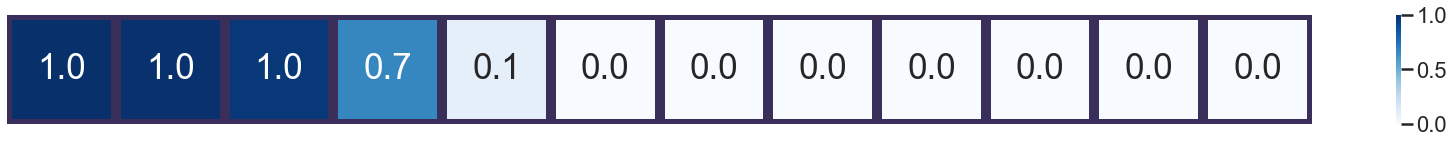

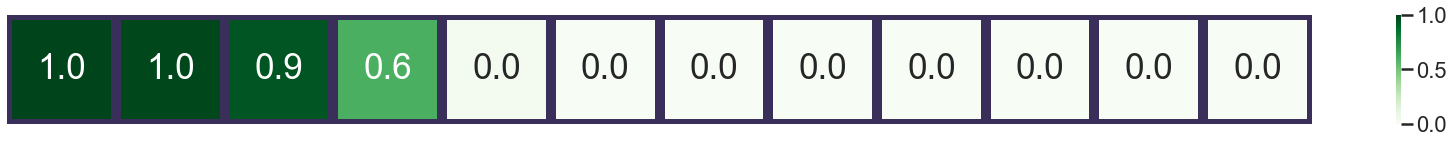

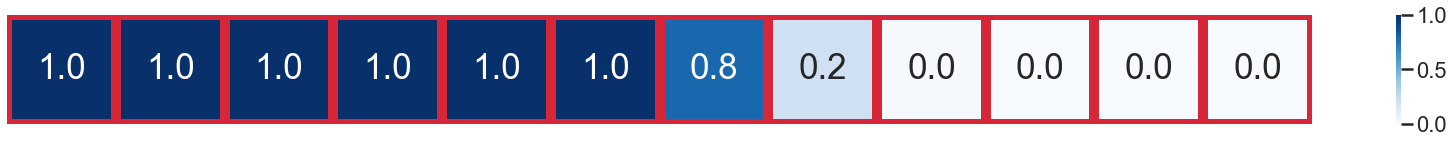

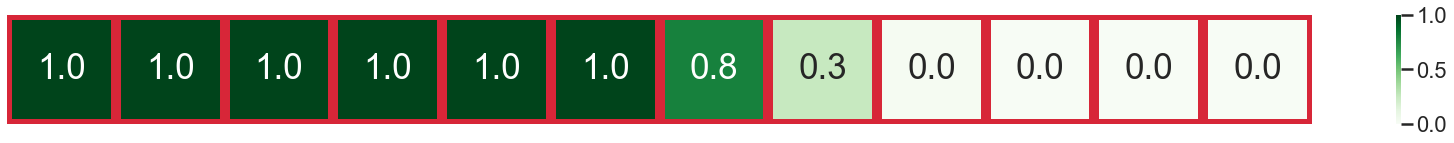

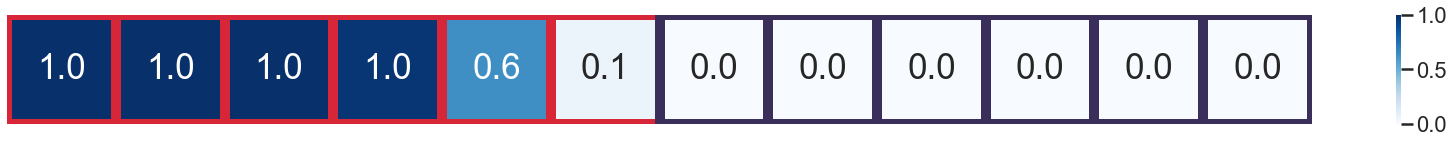

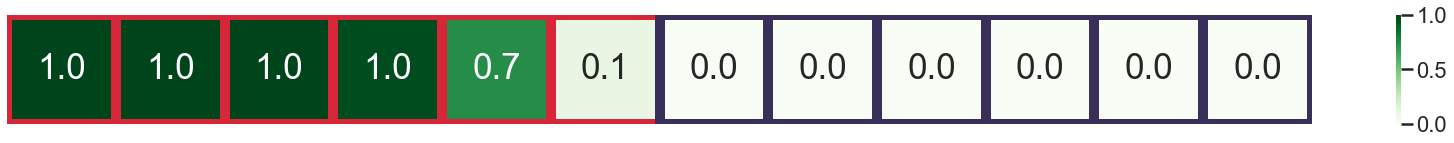

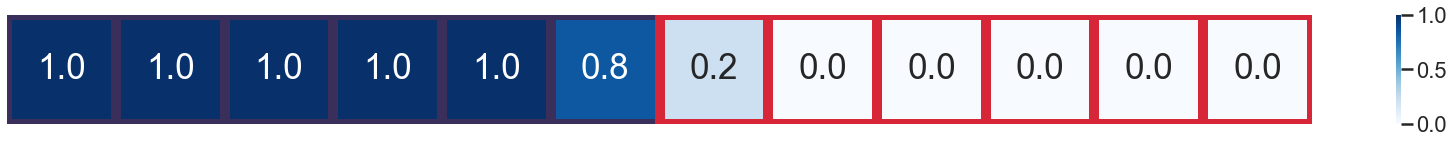

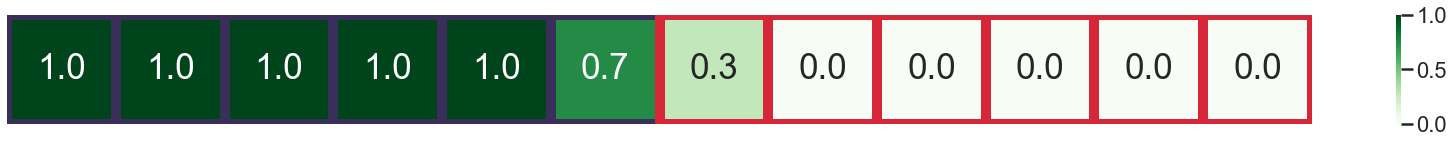

In [7]:
freq_data = {}
for bc in ['Novo', 'OP50', 'ONO', 'NON']:
    bact_s = bc
    mig_mod=1
    pred =False
    data, index, mig = simulate_pop_dynamic('A', 'C', bact_s, inti_food=food_0, mig_rate=0.1, n_pop = 12,  t = 1000, predation=pred)
    heat = np.zeros(shape=(1, 12))
    for cat, camp in zip(['A', 'd'], ['Blues', 'Greens']):
        for i in index:
            if cat == 'A':
                heat[i[0]][i[1]] = np.sum(data['pop1'][i][-1][5:])/(np.sum(data['pop1'][i][-1][5:]) + np.sum(data['pop2'][i][-1][5:]))
            elif cat == 'd':
                heat[i[0]][i[1]] = np.sum(data['pop1'][i][-1][2])/(np.sum(data['pop1'][i][-1][2]) + np.sum(data['pop2'][i][-1][2]))
        fig, ax = plt.subplots(1,1, figsize=(30,2))

        if bact_s == 'OP50':
            sns.heatmap(heat, linewidths=10, linecolor=['#D72638' for i in range(6)], xticklabels=False, yticklabels=False, vmin=0., vmax=1, cmap=camp,annot=True, square=True, fmt=".1f", annot_kws={"fontsize":35})
        elif bact_s == 'Novo':
            sns.heatmap(heat, linewidths=10, linecolor=['#392F5A' for i in range(6)], xticklabels=False, yticklabels=False, vmin=0., vmax=1, cmap=camp,annot=True, square=True, fmt=".1f", annot_kws={"fontsize":35})
        else:
            cols = []
            for i in env_arr[bact_s]:
                if i == 'OP50':
                    cols.append('#D72638')
                else:
                    cols.append('#392F5A')
            sns.heatmap(heat, linewidths=10, linecolor=cols, xticklabels=False, yticklabels=False, vmin=0., vmax=1, cmap=camp, square=True,annot=True, fmt=".1f", annot_kws={"fontsize":35})
        if not pred:
            if mig_mod > 1.:
                name = 'M'
            else:
                name = 'NP'
        else:
            if mig_mod > 1.:
                name = 'MP'
            else:
                name = 'P'  
        plt.savefig('./1d_heatmap/heat' + bact_s + '_' + name + '_' + cat +'.pdf', bbox_inches='tight', dpi=300)

In [3]:
%load_ext watermark
%watermark -n -u -v -iv -w -p graphviz

Last updated: Tue Feb 15 2022

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 7.25.0

graphviz: not installed

numpy     : 1.21.0
scipy     : 1.7.0
seaborn   : 0.11.1
matplotlib: 3.4.2
pandas    : 1.3.1

Watermark: 2.3.0

